In [32]:
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
sns.set_style('whitegrid')

911

In [33]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df_raw = df

In [35]:
#df.count

In [64]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [37]:
df.drop(df.columns[[15,16,17,18,19]],axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


______________________________________________________________________________________________________________________
### Bank client data:
    1. Age (numeric)
    2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
    3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
    4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    5.Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    6.Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    7.Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
 _______________________________________________________________________________________________________________
### Related with the last contact of the current campaign:
    1. Contact: contact communication type (categorical:'cellular','telephone')
    2.Month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
    3.Dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    4.Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
______________________________________________________________________________________________________________
### Other attributes:
    1.Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    2.Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    3.Previous: number of contacts performed before this campaign and for this client (numeric)
    4.Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
  
  y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [39]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

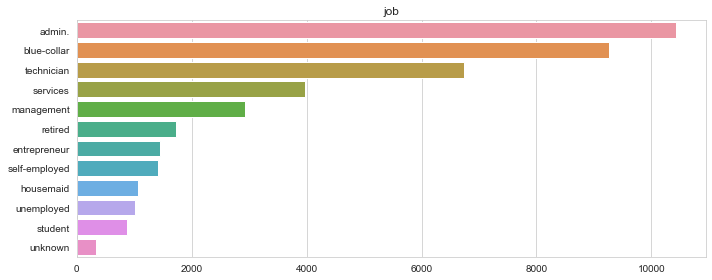

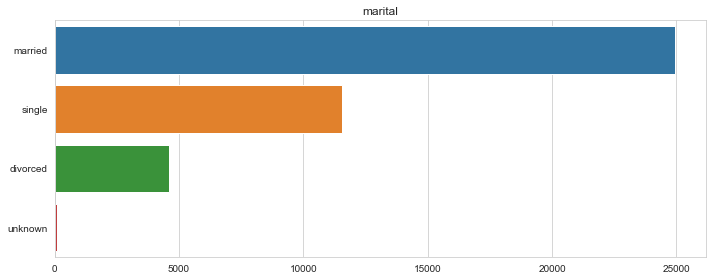

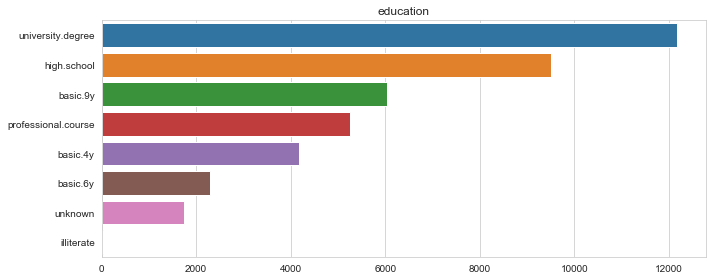

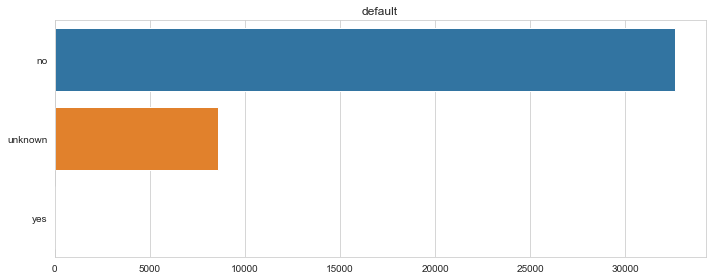

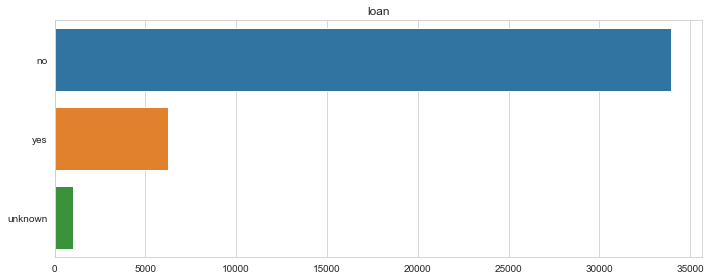

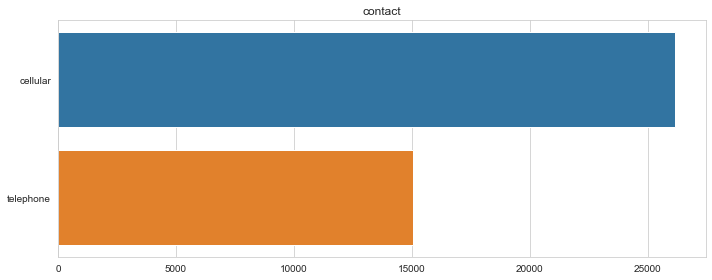

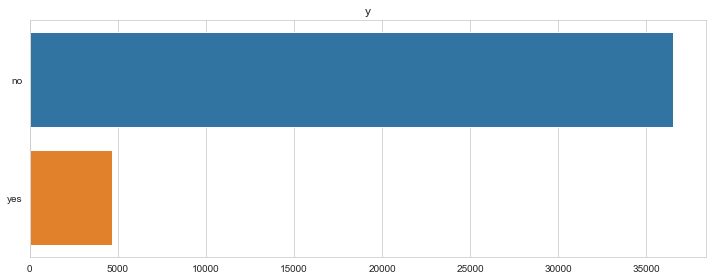

In [48]:
variables_cat =['job','marital','education','default','loan','contact','y']
for col in variables_cat:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values,df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [61]:
media = df.mean()
mediana = df.median()
moda = df.mode()
skew = df.skew()
kurtosis = df.kurtosis()
print('MEDIA: ',media)
print('MEDIANA: ',mediana)
print('MODA: ',moda)
print('SKEW: ',skew)
print('KURTOSIS:' ,kurtosis)

MEDIA:  age          40.024060
duration    258.285010
campaign      2.567593
pdays       962.475454
previous      0.172963
dtype: float64
MEDIANA:  age          38.0
duration    180.0
campaign      2.0
pdays       999.0
previous      0.0
dtype: float64
MODA:      age     job  marital          education default housing loan   contact  \
0  31.0  admin.  married  university.degree      no     yes   no  cellular   
1   NaN     NaN      NaN                NaN     NaN     NaN  NaN       NaN   

  month day_of_week  duration  campaign  pdays  previous     poutcome    y  
0   may         thu        85       1.0  999.0       0.0  nonexistent   no  
1   NaN         NaN        90       NaN    NaN       NaN          NaN  NaN  
SKEW:  age         0.784697
duration    3.263141
campaign    4.762507
pdays      -4.922190
previous    3.832042
dtype: float64
KURTOSIS: age          0.791312
duration    20.247938
campaign    36.979795
pdays       22.229463
previous    20.108816
dtype: float64


In [ ]:
df.plot.hexbin()
df.plot.bar(stacked=True)
df.plot.bar(stacked=False)
df.plot.line()
df.plot()

In [ ]:
sns.boxplot(x='education',y='age',data=df)

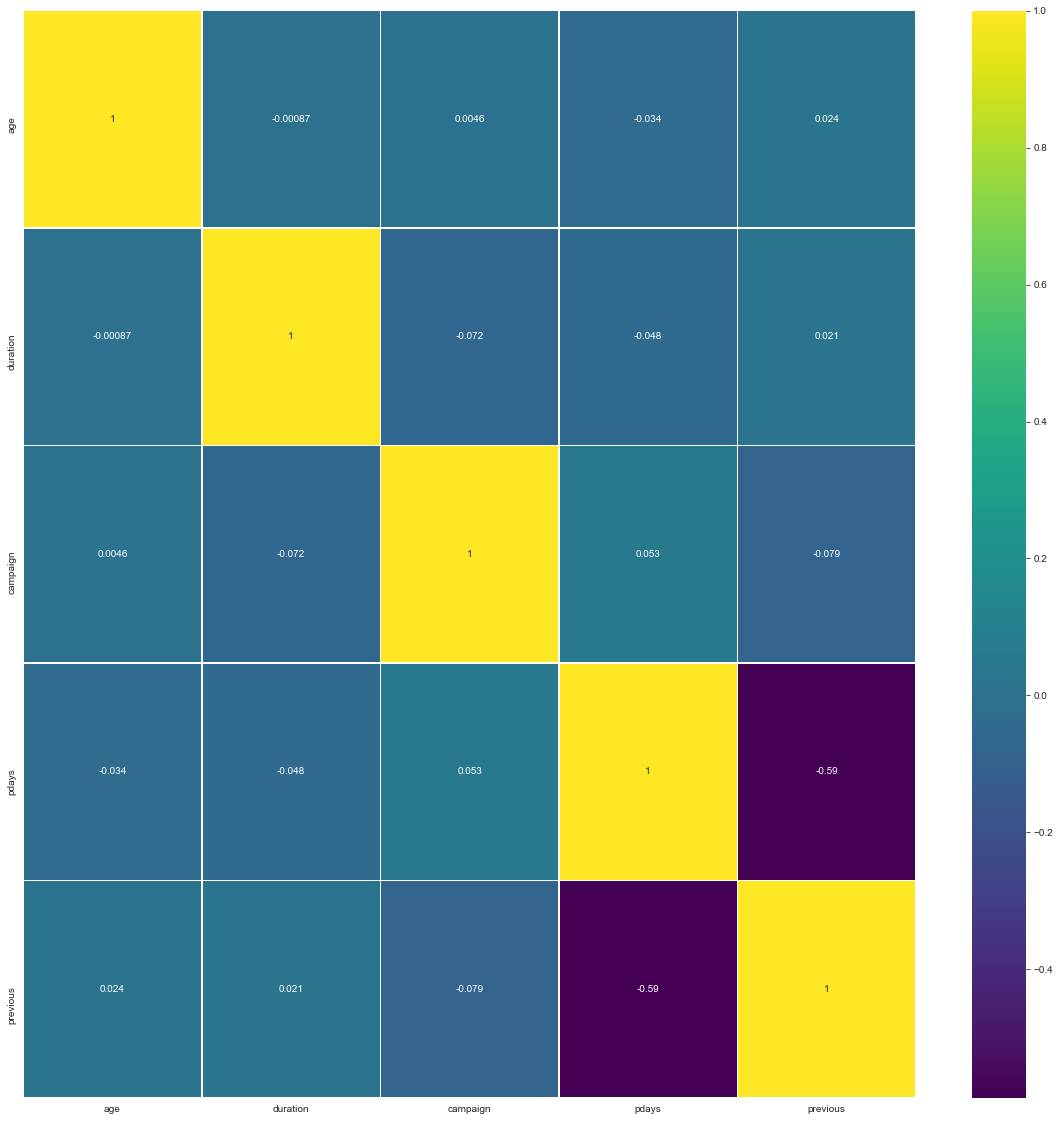

In [69]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [68]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN
